<a href="https://colab.research.google.com/github/snehaabr/datasciencecoursera/blob/master/AdvancedML_Project_FullCode_SnehaA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

homeFldr = '/content/drive/MyDrive/Colab Notebooks/02_ML/'

# Code to read the data
currFldr = 'Project_AdvancedML/'
fileFldr = homeFldr + currFldr
print(fileFldr)
data = pd.read_csv(fileFldr + "BankChurners.csv")
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/02_ML/Project_AdvancedML/


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


## Data Overview

In [ ]:
# let's create a copy of the data
df = data.copy()

In [ ]:
# let's view the first 5 rows of the data
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
# let's view the last 5 rows of the data
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [ ]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are many numerical columns both int and float types
* Attrition Flag, gender, education level, marital status, income category and card category are object types - May have to apply encoding on them.
* Missing values in education level and marital status columns

In [ ]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

In [ ]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

Missing values in education level (15%) and marital status(7%) columns

In [ ]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


* Customer_Age: The average customer age is approximately 46.33 years. The ages range from 26 to 73 years, with 25% of customers being 41 or younger, 50% being 46 or younger, and 75% being 52 or younger.

* Months_on_book: The average relationship duration with the bank is approximately 35.93 months (about 3 years), with a standard deviation of 7.99 months. The duration ranges from 13 to 56 months.

* Total_Relationship_Count: The average number of products held by customers is 3.81, with a standard deviation of 1.55. The count ranges from 1 to 6.

* Avg_Utilization_Ratio: The average card utilization ratio is 0.28, with a standard deviation of 0.28.

* There is significant variability in credit limits and available credit (Avg_Open_To_Buy), as indicated by their high standard deviations.
* Most customers have been with the bank for a few years, with a median relationship length of 36 months.
* The transaction amounts and counts vary widely among customers, suggesting diverse spending behaviors.
* The average utilization ratio indicates that, on average, customers use around 28% of their available credit.


In [ ]:
# list of all categorical variables
cat_col = df.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(normalize=True))
    print("-" * 100)

CLIENTNUM
714337233   0.000
768805383   0.000
818770008   0.000
713982108   0.000
769911858   0.000
             ... 
806160108   0.000
709327383   0.000
806165208   0.000
708508758   0.000
784725333   0.000
Name: proportion, Length: 10127, dtype: float64
----------------------------------------------------------------------------------------------------
Attrition_Flag
Existing Customer   0.839
Attrited Customer   0.161
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
Customer_Age
44   0.049
49   0.049
46   0.048
45   0.048
47   0.047
43   0.047
48   0.047
50   0.045
42   0.042
51   0.039
53   0.038
41   0.037
52   0.037
40   0.036
39   0.033
54   0.030
38   0.030
55   0.028
56   0.026
37   0.026
57   0.022
36   0.022
35   0.018
58   0.016
59   0.016
34   0.014
60   0.013
33   0.013
32   0.010
65   0.010
61   0.009
62   0.009
31   0.009
26   0.008
30   0.007
63   0.006
29   0.006
64   0.004
27   0.003


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
# CLIENTNUM is unique for each customer and might not add value to modeling
df.drop(["CLIENTNUM"], axis=1, inplace=True)

- We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage

In [ ]:
# Create a copy of data to perform detailed EDA in the appendix section.
data = df.copy()

* Encoding 1 and 0 to 'yes' and 'no' respectively, for analysis.

In [ ]:
df["Attrition_Flag"].replace("Existing Customer", "yes", inplace=True)
df["Attrition_Flag"].replace("Attrited Customer", "no", inplace=True)

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

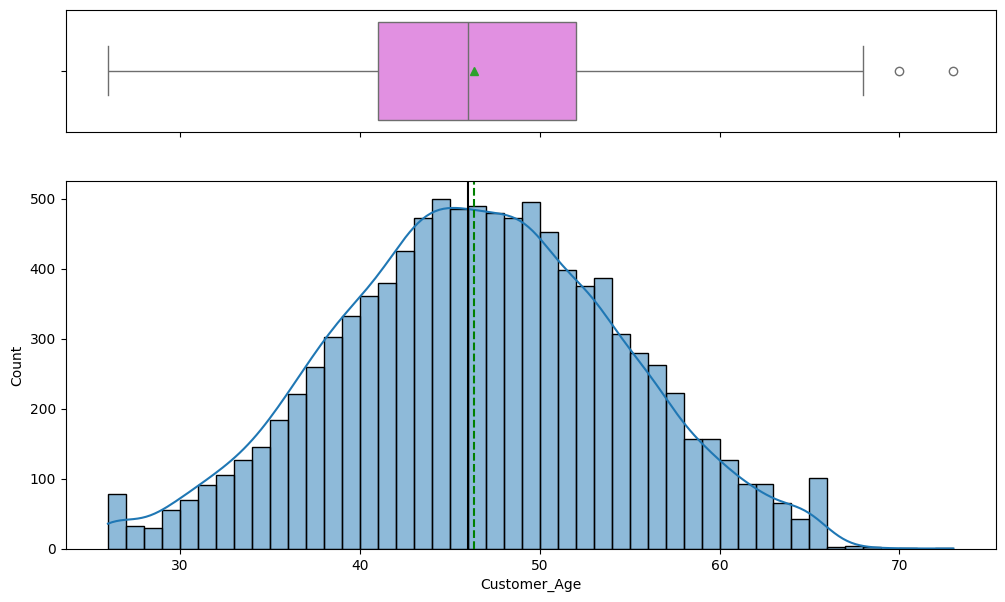

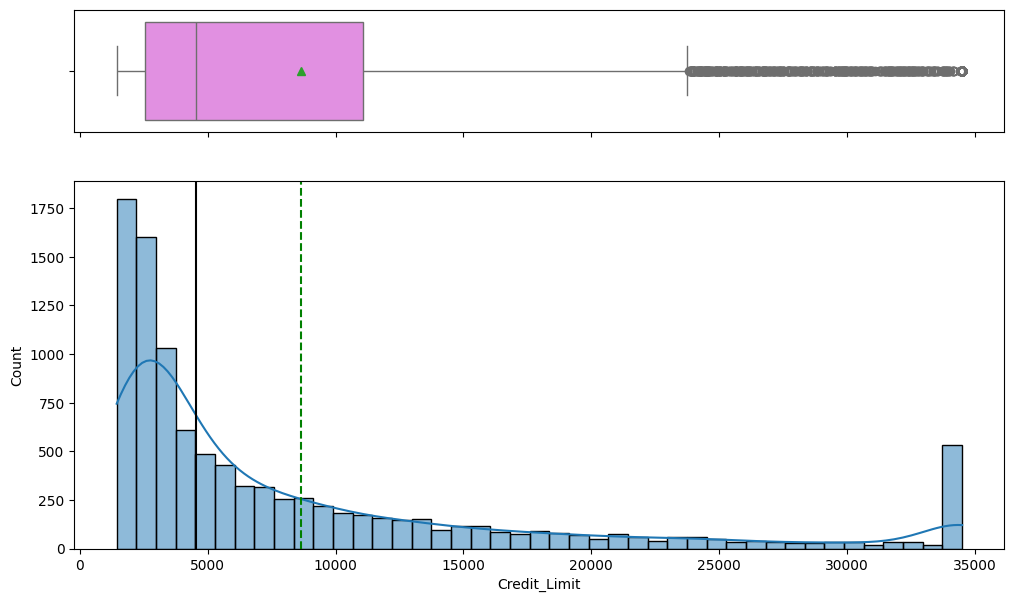

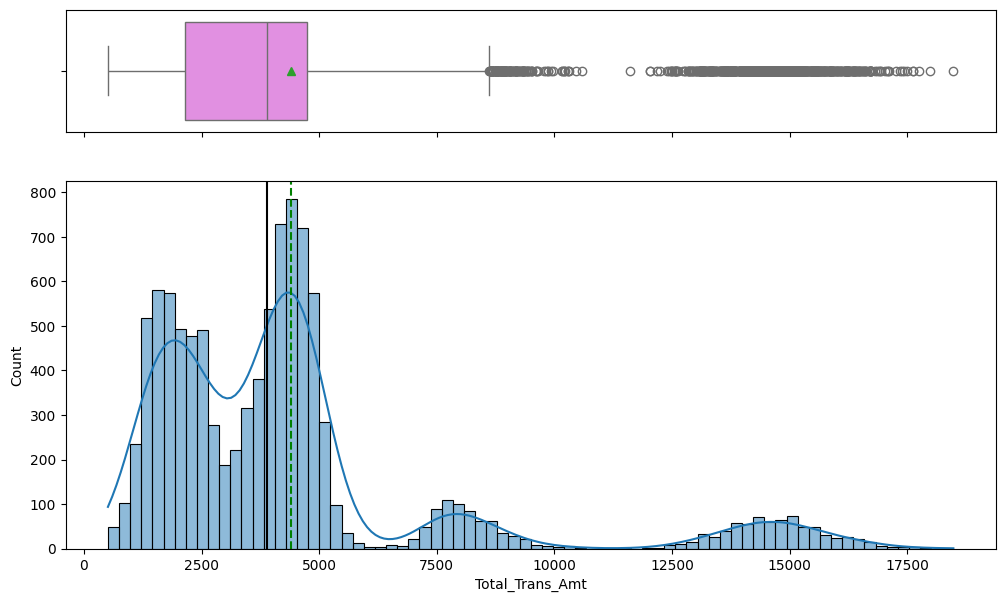

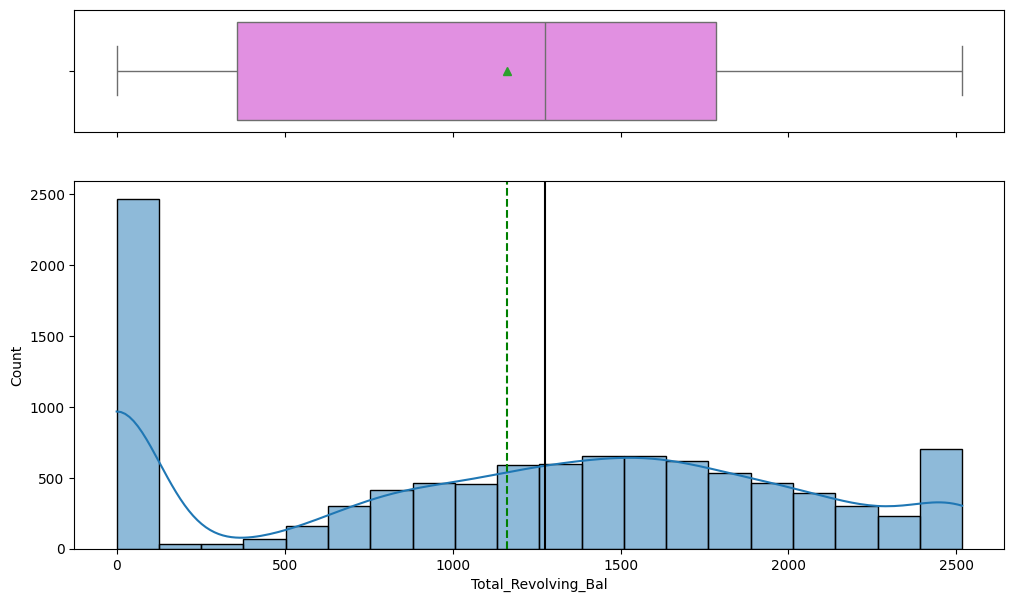

In [ ]:
# Applying the functions
# Numerical features
numerical_features = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Revolving_Bal']

for feature in numerical_features:
    histogram_boxplot(data, feature, kde=True)
    plt.show()

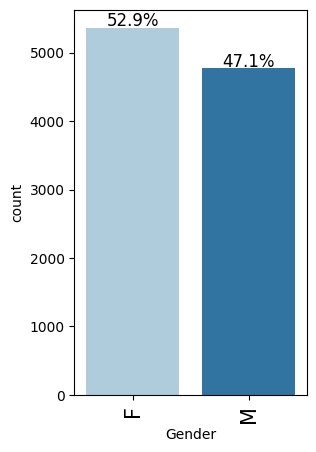

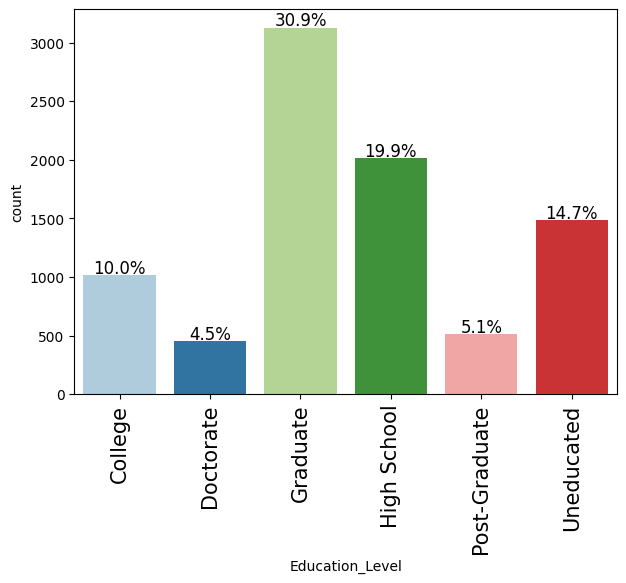

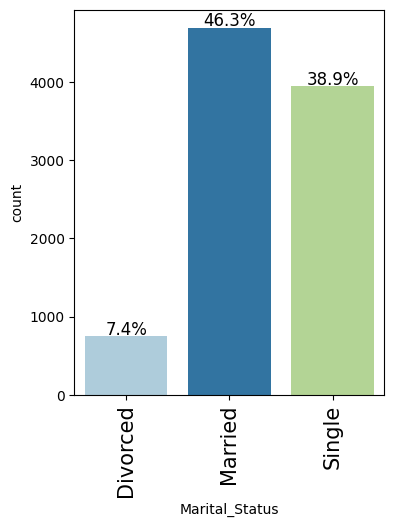

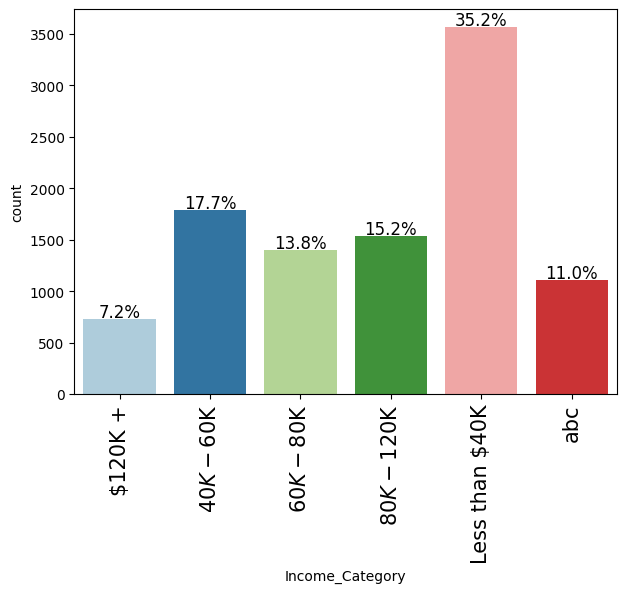

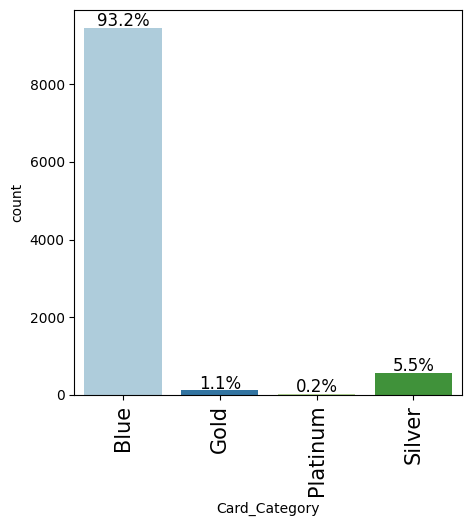

In [ ]:
# Categorical features
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for feature in categorical_features:
    labeled_barplot(data, feature, perc=True)

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


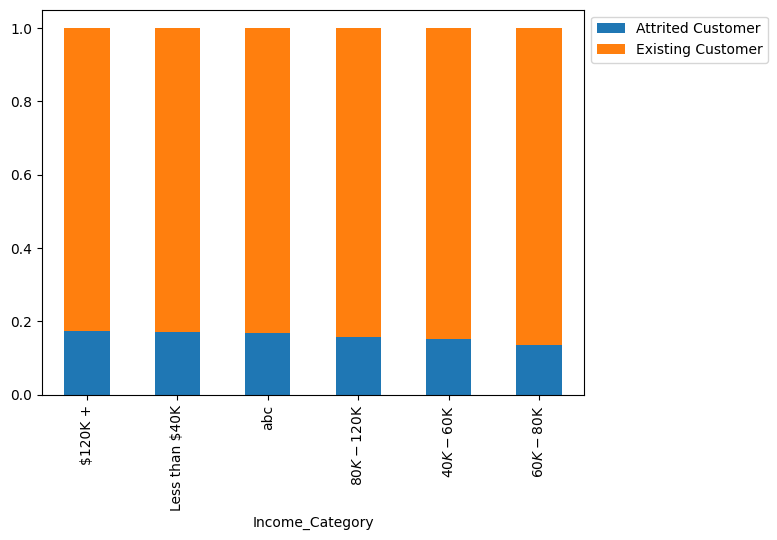

In [ ]:
# Stacked barplot for a categorical feature with respect to the target
stacked_barplot(data, 'Income_Category', 'Attrition_Flag')

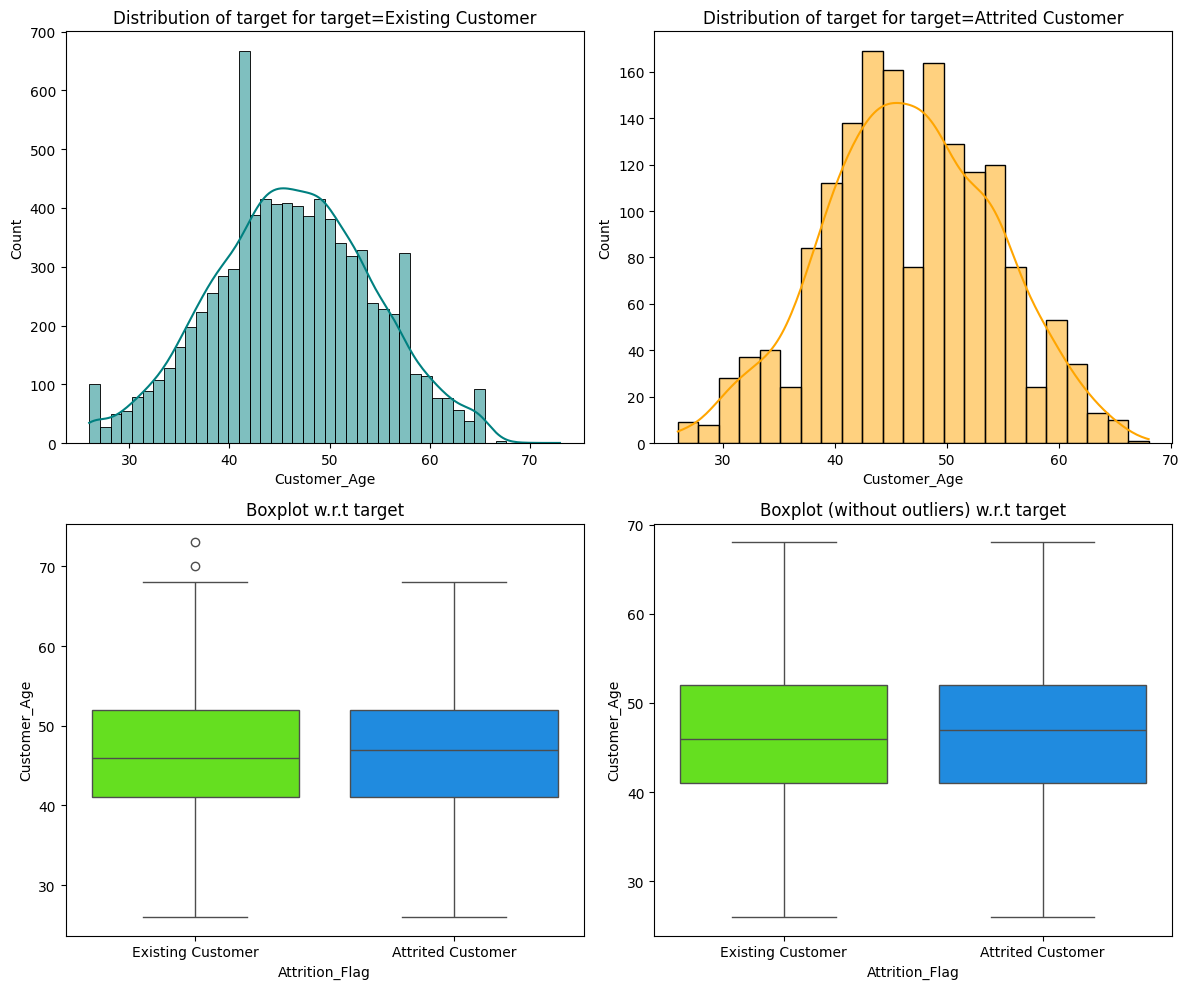

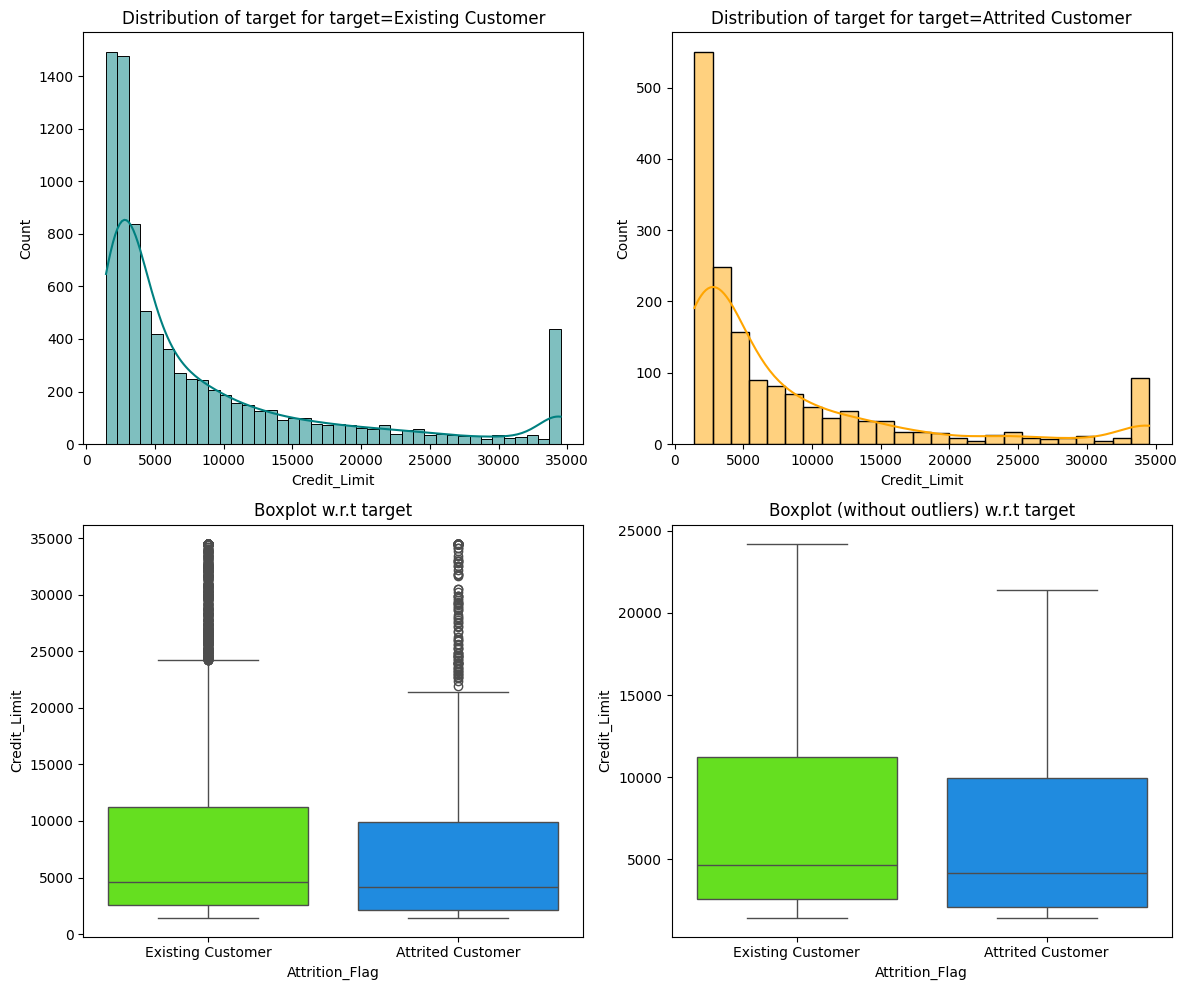

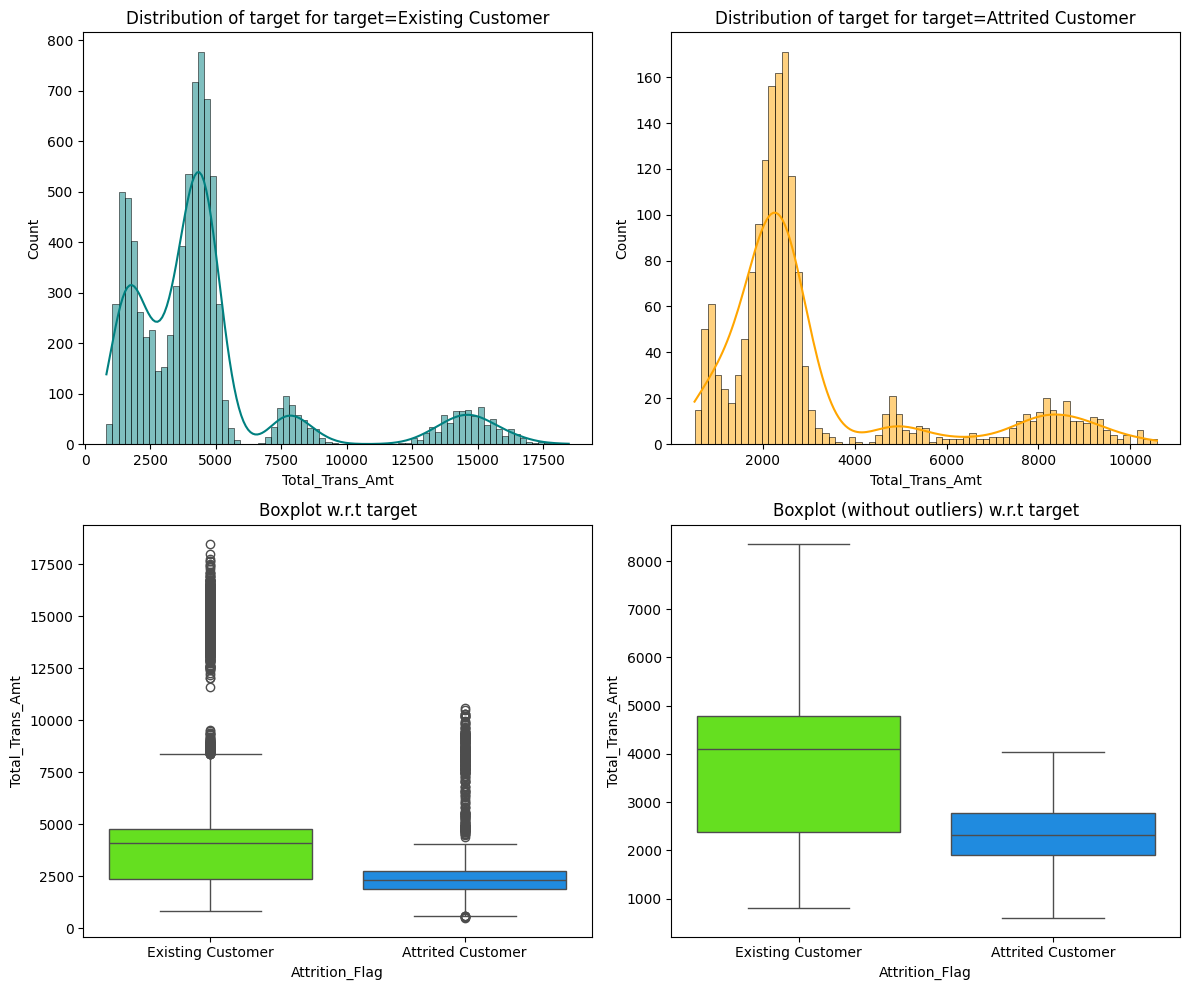

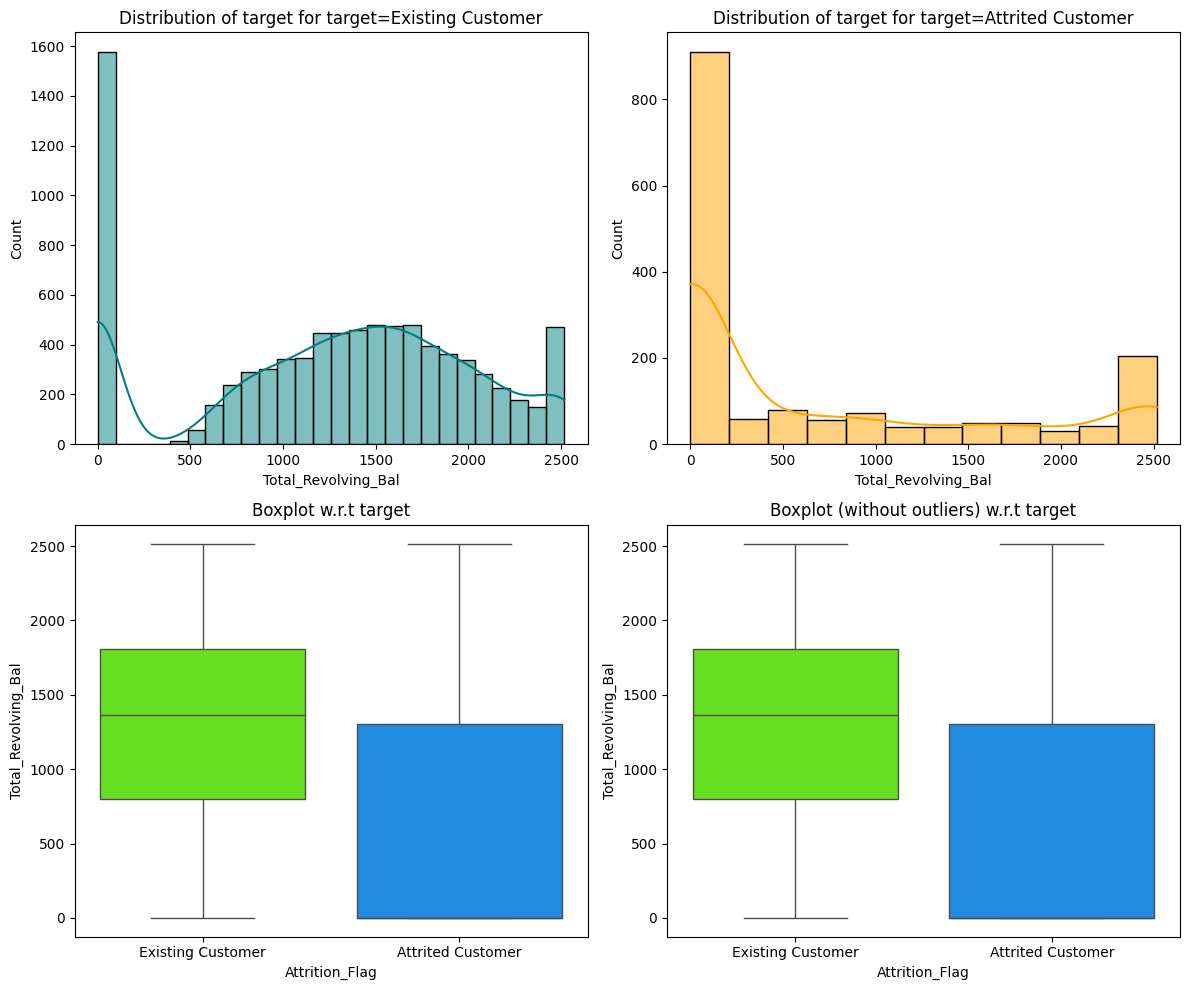

In [ ]:
# Distribution plots with respect to the target for numerical features
for feature in numerical_features:
    distribution_plot_wrt_target(data, feature, 'Attrition_Flag')

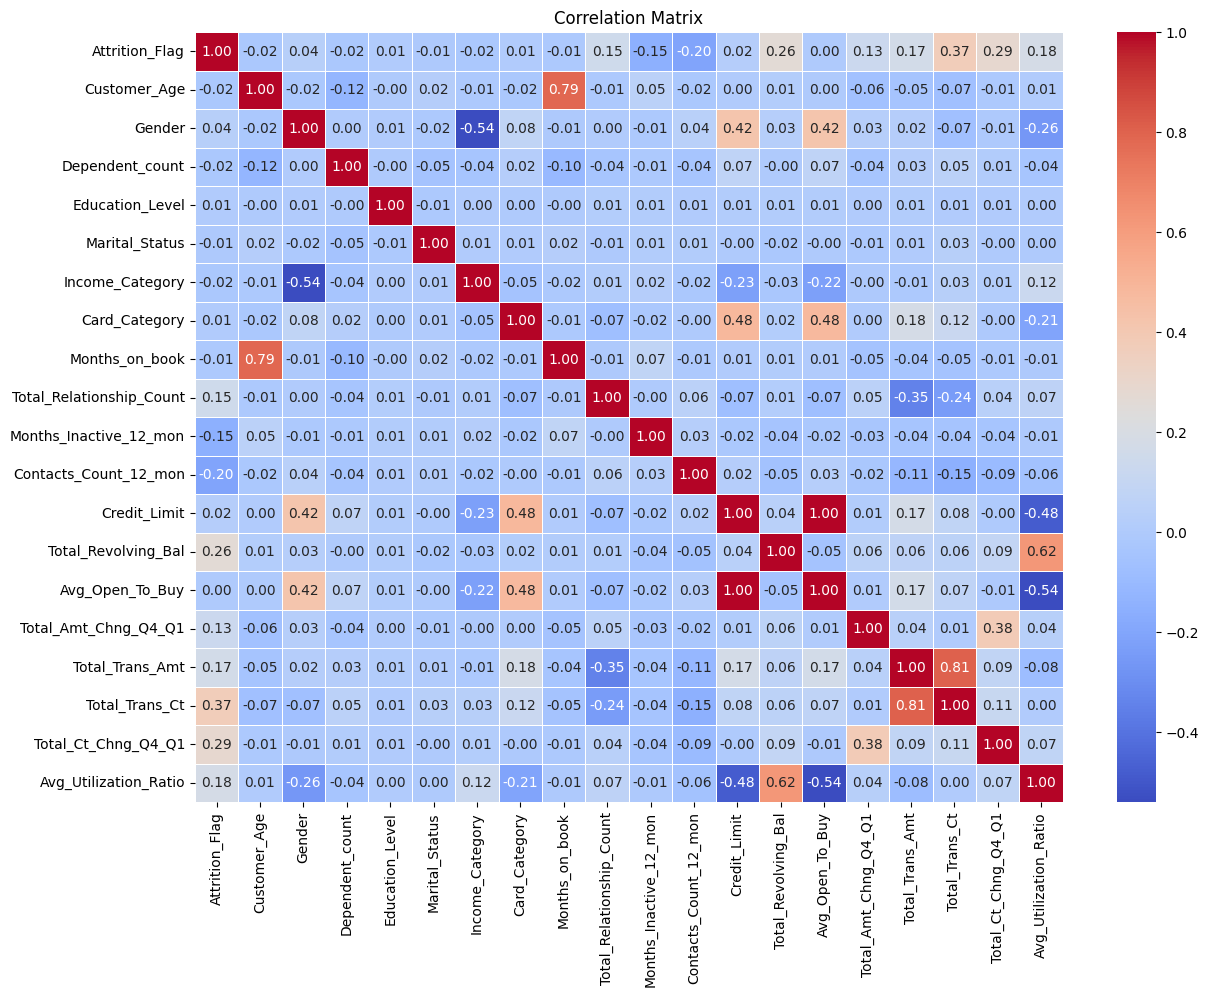

          Feature1         Feature2  Correlation
0     Customer_Age   Months_on_book        0.789
1   Months_on_book     Customer_Age        0.789
2     Credit_Limit  Avg_Open_To_Buy        0.996
3  Avg_Open_To_Buy     Credit_Limit        0.996
4  Total_Trans_Amt   Total_Trans_Ct        0.807
5   Total_Trans_Ct  Total_Trans_Amt        0.807


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Copy the dataframe
dataCorr = df.copy()

# Ensure 'Attrition_Flag' is numeric
dataCorr["Attrition_Flag"].replace({"Attrited Customer": 1, "Existing Customer": 0}, inplace=True)

# Check for any non-numeric columns and convert if necessary
# Assuming df initially had non-numeric columns that need to be converted
for col in dataCorr.columns:
    if dataCorr[col].dtype == 'object':
        dataCorr[col] = dataCorr[col].astype('category').cat.codes

# Compute the correlation matrix
correlation_matrix = dataCorr.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Threshold for strong correlation
threshold = 0.7

# Find pairs with strong correlation
strong_corr_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)].stack().reset_index()
strong_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Display the pairs
print(strong_corr_pairs)


**Questions**:

1. How is the total transaction amount distributed?

**Answer**: High transaction amounts indicate greater engagement with the bank's services. Customers with higher transaction amounts are more likely to remain with the bank, as seen in the distribution of existing customers.

2. What is the distribution of the level of education of customers?

**Answer:** Graduates and high school graduates make up over 50% of the customer base

3. What is the distribution of the level of income of customers?

**Answer**: There are different types of income customers. However there is no particular strong correlation identified for churn based on income.


4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)? - Added in Detailed EDA
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)? - Added in Detailed EDA
6. What are the attributes that have a strong correlation with each other?

**Answer**:

* Strong Positive Correlations:
-- Credit_Limit and Avg_Open_To_Buy: Correlation = 1.00
It suggests that as the credit limit increases, the average open-to-buy amount also increases proportionally.
-- Credit_Limit and Total_Revolving_Bal: Correlation = 0.62, meaning that customers with higher credit limits tend to have higher revolving balances.

* Given the negative correlation between Total_Trans_Ct and Attrition_Flag, increasing customer engagement through more frequent transactions could help reduce churn. Implementing loyalty programs or incentives for higher transaction counts might be effective.

* The positive correlation between Total_Revolving_Bal and Attrition_Flag indicates that customers with high revolving balances are more likely to churn. Targeting these customers with financial advice, debt consolidation offers, or personalized repayment plans could reduce churn.

## Data Pre-processing

## Encoding and Missing value replacement

In [ ]:
data1 = df.copy()

In [ ]:
df['Marital_Status'].unique()

array(['Married', 'Single', nan, 'Divorced'], dtype=object)

In [ ]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', nan, 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'abc'], dtype=object)

In [ ]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

* There are missing values in Marital_Status and Education_Level columns
* Converting them to 'Unknown'

In [ ]:
data1['Marital_Status'].fillna('Unknown', inplace=True)
data1['Education_Level'].fillna('Unknown', inplace=True)

In [ ]:
data1['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [ ]:
data1['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
# we need to pass numerical values for each categorical column for imputation so we will label encode them
gender = {"M": 0, "F": 1}
data1["Gender"] = data1["Gender"].map(gender)

marital_status = {"Unknown": 0, "Single": 1, "Married": 2, "Divorced":3}
data1["Marital_Status"] = data1["Marital_Status"].map(marital_status).astype(int)

Education_Level = {
    "Unknown":0,
    "Uneducated": 1,
    "High School": 2,
    "College": 3,
    "Graduate": 4,
    "Post-Graduate": 5,
    "Doctorate": 6
}
data1["Education_Level"] = data1["Education_Level"].map(Education_Level)

Income_Category = {
    "Less than $40K": 0,
    "$40K - $60K": 1,
    "$60K - $80K": 2,
    "$80K - $120K": 3,
    "$120K +": 4,
    "abc": 5
}
data1["Income_Category"] = data1["Income_Category"].map(Income_Category)

Card_Category = {"Blue": 0, "Silver": 1, "Gold": 2, "Platinum": 3}
data1["Card_Category"] = data1["Card_Category"].map(Card_Category)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
data1.shape

(10127, 20)

In [ ]:
data1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,yes,45,0,3,2,2,2,0,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,yes,49,1,5,4,1,0,0,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,yes,51,0,3,4,2,3,0,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,yes,40,1,4,2,0,0,0,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,yes,40,0,3,1,2,2,0,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
data1.tail(20)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10107,no,61,0,0,4,1,2,0,54,2,1,4,11859.000,1644,10215.000,0.866,8930,79,0.837,0.139
10108,no,47,0,4,4,3,3,0,39,4,3,4,17504.000,476,17028.000,0.892,10468,66,0.737,0.027
10109,yes,47,0,5,2,1,0,0,35,4,3,5,4165.000,0,4165.000,0.813,17093,111,0.820,0.000
10110,yes,56,0,1,4,1,3,1,49,5,2,2,34516.000,1091,33425.000,0.640,15274,108,0.714,0.032
10111,yes,49,0,1,4,1,2,0,40,6,3,3,6481.000,1569,4912.000,0.692,15937,119,0.803,0.242
10112,no,33,0,2,3,2,4,2,20,2,1,4,34516.000,0,34516.000,1.004,9338,73,0.622,0.000
10113,no,27,0,0,2,3,2,0,36,2,3,2,13303.000,2517,10786.000,0.929,10219,85,0.809,0.189
10114,yes,29,0,0,4,2,0,0,15,3,1,5,4700.000,0,4700.000,0.617,14723,96,0.655,0.000
10115,yes,38,0,1,1,1,1,0,36,2,3,2,5639.000,1558,4081.000,0.614,16628,109,0.946,0.276
10116,yes,46,0,5,3,1,3,0,36,1,2,3,13187.000,2241,10946.000,0.689,15354,112,0.931,0.170


In [ ]:
data1.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

* No more missing values anywhere

### Data Preparation for Modeling

In [ ]:
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"].apply(lambda x: 1 if x == "yes" else 0)

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


In [ ]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

* All missing values have been treated.
* Let's inverse map the encoded values.

### Reverse Mapping for Encoded Variables

In [ ]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [ ]:
inverse_mapping(gender, "Gender")
inverse_mapping(marital_status, "Marital_Status")
inverse_mapping(Education_Level, "Education_Level")
inverse_mapping(Income_Category, "Income_Category")
inverse_mapping(Card_Category, "Card_Category")

* Checking inverse mapped values/categories.

#### `Train Dataset`

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    3205
M    2870
Name: count, dtype: int64
******************************
Education_Level
Graduate         1866
High School      1212
Uneducated        928
Unknown           897
College           598
Post-Graduate     299
Doctorate         275
Name: count, dtype: int64
******************************
Marital_Status
Married     2848
Single      2346
Divorced     449
Unknown      432
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2130
$40K - $60K       1076
$80K - $120K       918
$60K - $80K        847
abc                668
$120K +            436
Name: count, dtype: int64
******************************
Card_Category
Blue        5668
Silver       327
Gold          71
Platinum       9
Name: count, dtype: int64
******************************


#### `Validation Dataset`

In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Gender
F    1106
M     920
Name: count, dtype: int64
******************************
Education_Level
Graduate         627
High School      399
Unknown          308
Uneducated       278
College          217
Post-Graduate    108
Doctorate         89
Name: count, dtype: int64
******************************
Marital_Status
Married     889
Single      814
Unknown     168
Divorced    155
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    712
$40K - $60K       340
$80K - $120K      306
$60K - $80K       280
abc               248
$120K +           140
Name: count, dtype: int64
******************************
Card_Category
Blue        1893
Silver       108
Gold          19
Platinum       6
Name: count, dtype: int64
******************************


#### `Test Dataset`

In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

Gender
F    1047
M     979
Name: count, dtype: int64
******************************
Education_Level
Graduate         635
High School      402
Unknown          314
Uneducated       281
College          198
Post-Graduate    109
Doctorate         87
Name: count, dtype: int64
******************************
Marital_Status
Married     950
Single      783
Unknown     149
Divorced    144
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    719
$40K - $60K       374
$80K - $120K      311
$60K - $80K       275
abc               196
$120K +           151
Name: count, dtype: int64
******************************
Card_Category
Blue        1875
Silver       120
Gold          26
Platinum       5
Name: count, dtype: int64
******************************


* Inverse mapping returned original labels.

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 32) (2026, 32) (2026, 32)


* Just to check the dummy variables created, use the train dataset

In [ ]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
9501,47,2,37,1,2,2,21714.000,1969,19745.000,0.944,13270,104,0.625,0.091,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
5065,49,4,42,5,1,4,7789.000,957,6832.000,0.724,3412,70,0.842,0.123,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
2375,53,2,36,6,1,3,3176.000,1470,1706.000,0.388,1634,53,0.472,0.463,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
7579,56,2,45,3,3,1,3296.000,1435,1861.000,0.968,4327,66,0.737,0.435,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2776,47,4,36,3,3,3,17557.000,0,17557.000,0.667,2142,62,0.378,0.000,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False


* After encoding there are 32 columns (initially 20)

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Initial Model Building

### Model Building with original data

Sample code for model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9984310649146891
Random forest: 1.0
GBM: 0.9927436752304374
Adaboost: 0.9825455971759168
dtree: 1.0

Validation Performance:

Bagging: 0.9729411764705882
Random forest: 0.99
GBM: 0.9894117647058823
Adaboost: 0.9823529411764705
dtree: 0.9547058823529412


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9984, Validation Score: 0.9729, Difference: 0.0255
Random forest: Training Score: 1.0000, Validation Score: 0.9900, Difference: 0.0100
GBM: Training Score: 0.9927, Validation Score: 0.9894, Difference: 0.0033
Adaboost: Training Score: 0.9825, Validation Score: 0.9824, Difference: 0.0002
dtree: Training Score: 1.0000, Validation Score: 0.9547, Difference: 0.0453


#### Conclusion:
* Best Performing Model: GBM (Gradient Boosting Machine)

Reason: The GBM model has a high validation score (0.9894) and the smallest difference between training and validation scores (0.0033). This indicates that it generalizes well to unseen data while maintaining high performance, thus striking the best balance between accuracy and overfitting.

* Second Best: Random Forest

Reason: The Random Forest model has a perfect training score and a very high validation score (0.9900) with a small difference (0.0100). It performs slightly better than GBM in terms of validation score but shows slightly more overfitting.

* Least Overfitting: Adaboost

Reason: The Adaboost model has a very small difference between training and validation scores (0.0002), indicating almost no overfitting. However, its validation score (0.9824) is slightly lower compared to GBM and Random Forest.

* In summary, while Adaboost shows minimal overfitting, GBM is considered the best performing model due to its high validation score and excellent generalization with a low difference between training and validation scores.

### Model Building with Oversampled data


In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 5099
Before Oversampling, counts of label 'No': 976 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 32)
After Oversampling, the shape of train_y: (10198,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9954893116297313
Random forest: 1.0
GBM: 0.975485389292018
Adaboost: 0.9568542851539518
dtree: 1.0

Validation Performance:

Bagging: 0.9552941176470588
Random forest: 0.9729411764705882
GBM: 0.9747058823529412
Adaboost: 0.9541176470588235
dtree: 0.9494117647058824


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9955, Validation Score: 0.9553, Difference: 0.0402
Random forest: Training Score: 1.0000, Validation Score: 0.9729, Difference: 0.0271
GBM: Training Score: 0.9755, Validation Score: 0.9747, Difference: 0.0008
Adaboost: Training Score: 0.9569, Validation Score: 0.9541, Difference: 0.0027
dtree: Training Score: 1.0000, Validation Score: 0.9494, Difference: 0.0506


* GBM (Gradient Boosting Machine) is considered the best performing model due to its high validation score and excellent generalization with minimal overfitting.

Reason: The GBM model has a high validation score (0.9747) and the smallest difference between training and validation scores (0.0008). This indicates that it generalizes well to unseen data while maintaining high performance, thus striking the best balance between accuracy and overfitting.

* Second Best: Adaboost

Reason: The Adaboost model has a slightly lower validation score (0.9541) compared to GBM but shows a very small difference between training and validation scores (0.0027), indicating minimal overfitting.

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 5099
Before Under Sampling, counts of label 'No': 976 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 32)
After Under Sampling, the shape of train_y: (1952,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9948770491803278
Random forest: 1.0
GBM: 0.9692622950819673
Adaboost: 0.9405737704918032
dtree: 1.0

Validation Performance:

Bagging: 0.9235294117647059
Random forest: 0.9405882352941176
GBM: 0.9488235294117647
Adaboost: 0.9223529411764706
dtree: 0.9123529411764706


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9949, Validation Score: 0.9235, Difference: 0.0713
Random forest: Training Score: 1.0000, Validation Score: 0.9406, Difference: 0.0594
GBM: Training Score: 0.9693, Validation Score: 0.9488, Difference: 0.0204
Adaboost: Training Score: 0.9406, Validation Score: 0.9224, Difference: 0.0182
dtree: Training Score: 1.0000, Validation Score: 0.9124, Difference: 0.0876


* Best Performing Model: GBM (Gradient Boosting Machine)

Reason: The GBM model has the highest validation score (0.9488) with a relatively low difference between training and validation scores (0.0204). This indicates that it generalizes well to unseen data while maintaining high performance, with less overfitting compared to other models.

* Second Best: Adaboost

Reason: The Adaboost model has a slightly lower validation score (0.9224) but shows the smallest difference between training and validation scores (0.0182), indicating minimal overfitting.

* After building 15 models, it was observed that both the GBM and Adaboost models, trained on an undersampled dataset, as well as the GBM model trained on an oversampled dataset, exhibited strong performance on both the training and validation datasets.
* Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance
* We will tune these 3 models using the same data (undersampled or oversampled) as we trained them on befor

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

### Tuning  Gradient Boosting model with Undersampled Data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
# param_grid = {
#     "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
#     "n_estimators": np.arange(125,175,25),
#     "learning_rate": [0.01, 0.2, 0.05, 1],
#     "subsample":[0.8,0.9,1],
#     "max_features":[0.5,0.7,1],
# }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 75, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.936473050758765:
CPU times: user 1.54 s, sys: 275 ms, total: 1.82 s
Wall time: 12.3 s


In [ ]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=0.5,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=0.9)

In [ ]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.938,0.923,0.951,0.937


In [ ]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.919,0.921,0.981,0.950


### Tuning Gradient Boosting model with Oversampled data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9654832688718274:
CPU times: user 3.84 s, sys: 191 ms, total: 4.03 s
Wall time: 38.9 s


In [ ]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=1,
    learning_rate=1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=1, max_features=1, n_estimators=125,
                           random_state=1, subsample=0.7)

In [ ]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.982,0.985,0.978,0.982


In [ ]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.939,0.969,0.958,0.964


### Tuning AdaBoostClassifier model with Undersampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV

param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# param_grid = {
#     "n_estimators": np.arange(10, 40, 10),
#     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
#     "base_estimator": [
#         DecisionTreeClassifier(max_depth=1, random_state=1),
#         DecisionTreeClassifier(max_depth=2, random_state=1),
#         DecisionTreeClassifier(max_depth=3, random_state=1),
#     ],
# }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 75, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.921098901098901:
CPU times: user 990 ms, sys: 21.3 ms, total: 1.01 s
Wall time: 6.87 s


In [ ]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.887,0.876,0.896,0.886


In [ ]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.871,0.877,0.966,0.919


## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.938,0.982,0.887
Recall,0.923,0.985,0.876
Precision,0.951,0.978,0.896
F1,0.937,0.982,0.886


* Best Performing Model: Gradient Boosting trained with oversampled data

Reasons:

* Highest Accuracy: 0.982
* Highest Recall: 0.985
* Highest Precision: 0.978
* Highest F1 Score: 0.982

The Gradient Boosting model trained with oversampled data has the highest scores across all metrics (Accuracy, Recall, Precision, and F1 Score), indicating that it performs the best overall. This model effectively balances the ability to correctly identify both positive cases (high recall) and correctly identify non-cases (high precision), resulting in the highest F1 score.

In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb_val.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.919,0.939,0.871
Recall,0.921,0.969,0.877
Precision,0.981,0.958,0.966
F1,0.950,0.964,0.919


* Similar results with Gradient Boosting with Oversampled data on validation set. Hence we will consider GB with oversampled data as the best performing model

In [ ]:
# Let's check the performance on test set
gbm2_test = model_performance_classification_sklearn(tuned_gbm2, X_test, y_test)
gbm2_test

,Accuracy,Recall,Precision,F1
0,0.938,0.966,0.960,0.963


* This performance is in line with what we achieved with this model on the train and validation sets
* So, this is a generalized model

## Feature Importance

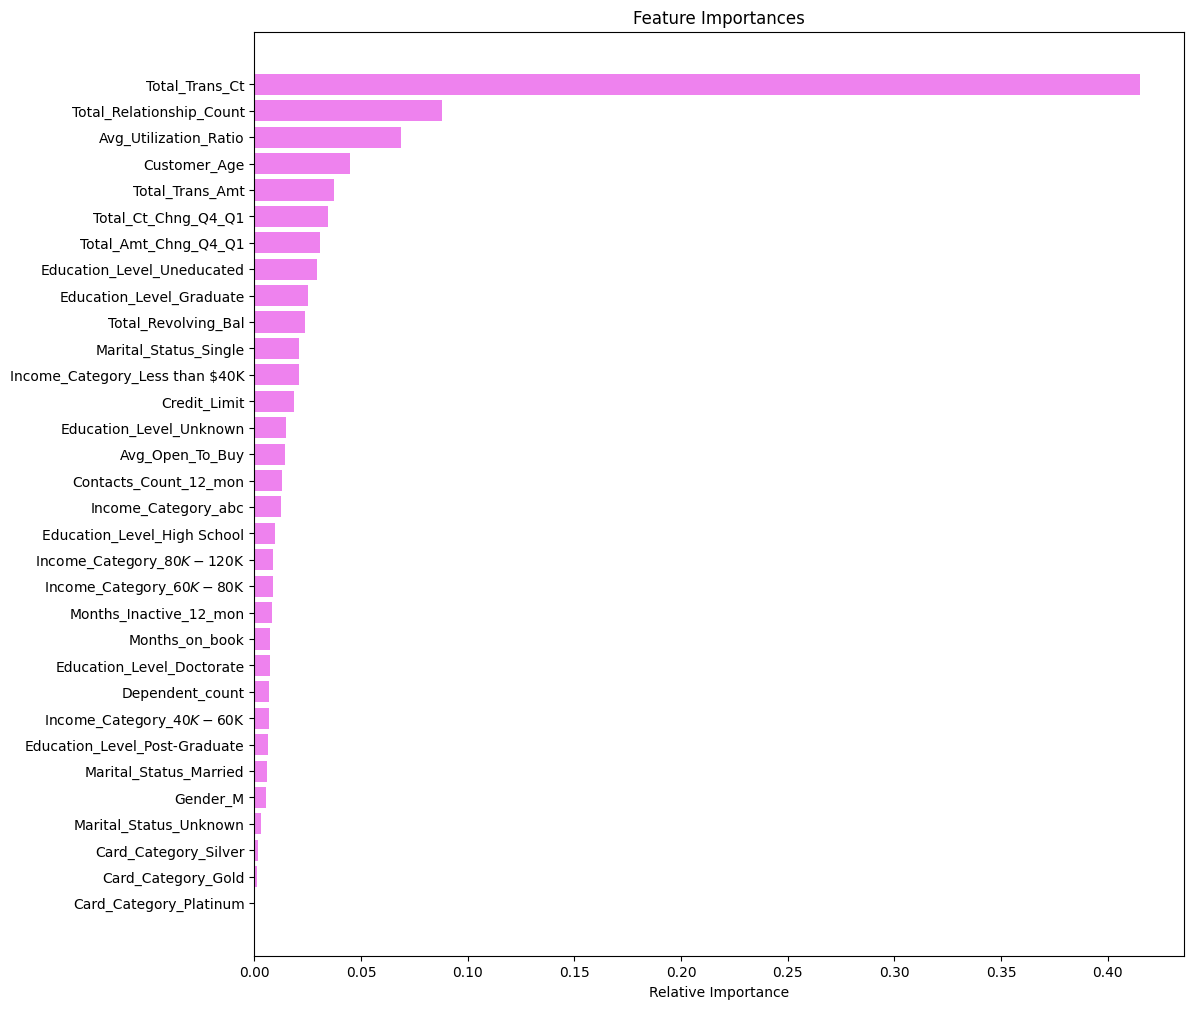

In [ ]:
feature_names = X_train.columns
importances = tuned_gbm2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Major important features:
1. Total_Trans_Ct: The total number of transactions a customer makes is the strongest indicator of whether they will churn. A higher transaction count might indicate more engagement and lower likelihood of churn.
2. Total_Relationship_Count: The number of products a customer holds with the bank. More products generally suggest a stronger relationship and lower likelihood of churn.
3. Avg_Utilization_Ratio: Indicates how much of the available credit a customer is using. Higher utilization might indicate financial stress, leading to higher churn probability.
4. Customer_Age: Age of the customer. Different age groups may have different churn behaviors.
5. Total_Trans_Amt: The total amount spent by the customer. Higher spending might indicate higher engagement and lower churn probability.
6. Total_Ct_Chng_Q4_Q1: Moderately important. Change in transaction count from Q4 to Q1. Significant changes might indicate changing customer behavior, potentially predicting churn.
7. Total_Amt_Chng_Q4_Q1: Moderately important. Change in transaction amount from Q4 to Q1. Similar to transaction count change, it indicates changing spending behavior.

## Lesser important features:
Education_Level, Marital_Status, Income_Category, Credit_Limit, Avg_Open_To_Buy, Contacts_Count_12_mon: These features have some importance but are less critical compared to transaction-related features and relationship with the bank. They provide additional context but are not as strong predictors as transaction behaviors.

##Least Important Features:
Card_Category, Months_on_book, Dependent_count, Gender, etc.: These features have the least impact on predicting churn. They may still provide useful information but are not primary drivers of the model's predictions.

## Additional EDA after model analysis and determining the critical features

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Total_Trans_Ct                                             
All                          1627               8500  10127
43                             85                 62    147
42                             75                 57    132
40                             69                 67    136
44                             69                 58    127
...                           ...                ...    ...
125                             0                 12     12
126                             0                 10     10
127                             0                 12     12
119                             0                 16     16
120                             0                 31     31

[127 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


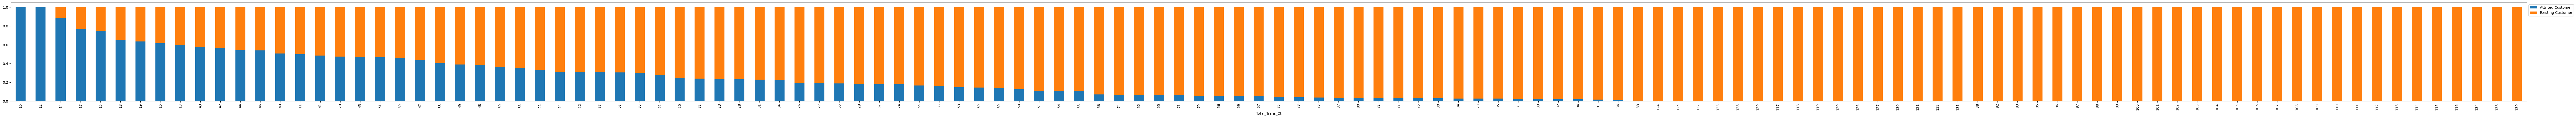

In [ ]:
stacked_barplot(data, "Total_Trans_Ct", "Attrition_Flag")

* As the count of transaction increases, customers are unlikely to churn or quit using the card

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


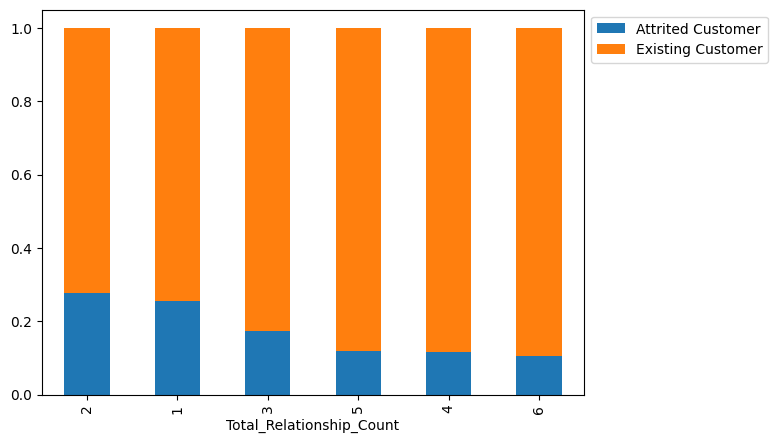

In [ ]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

* More products that the customers have with the bank, its lively that they would quit using the respective credit card from the bank

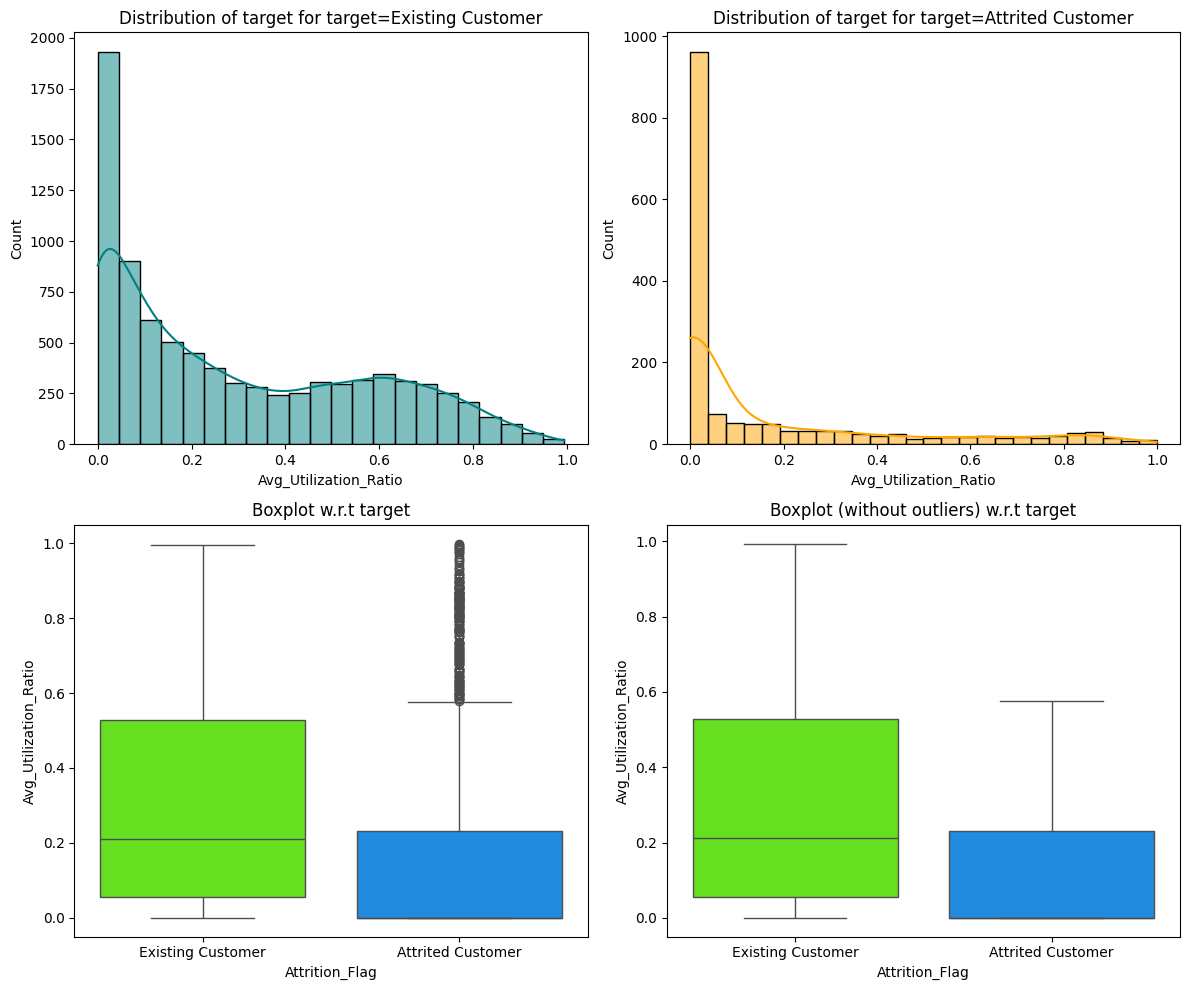

In [ ]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

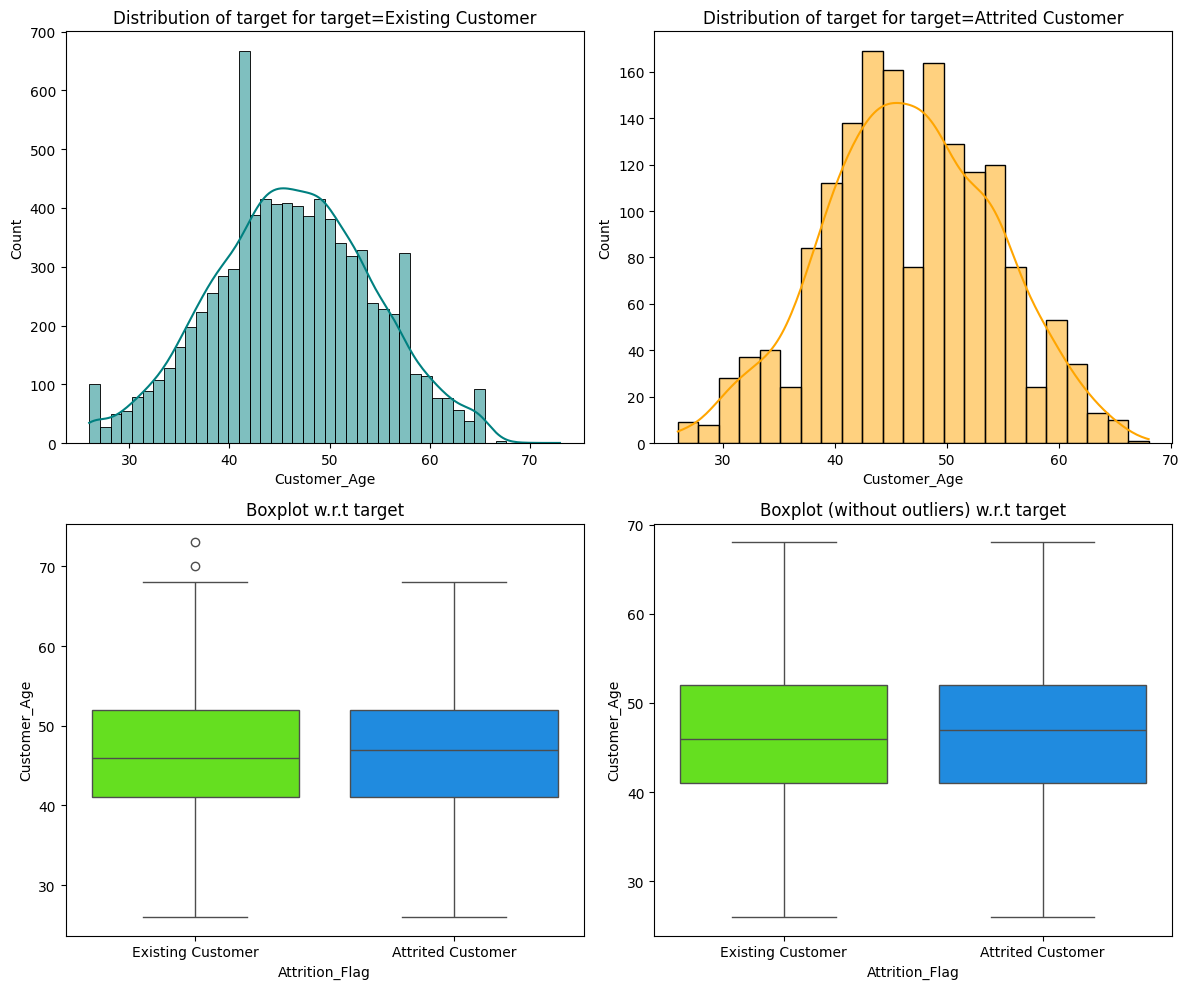

In [ ]:

distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

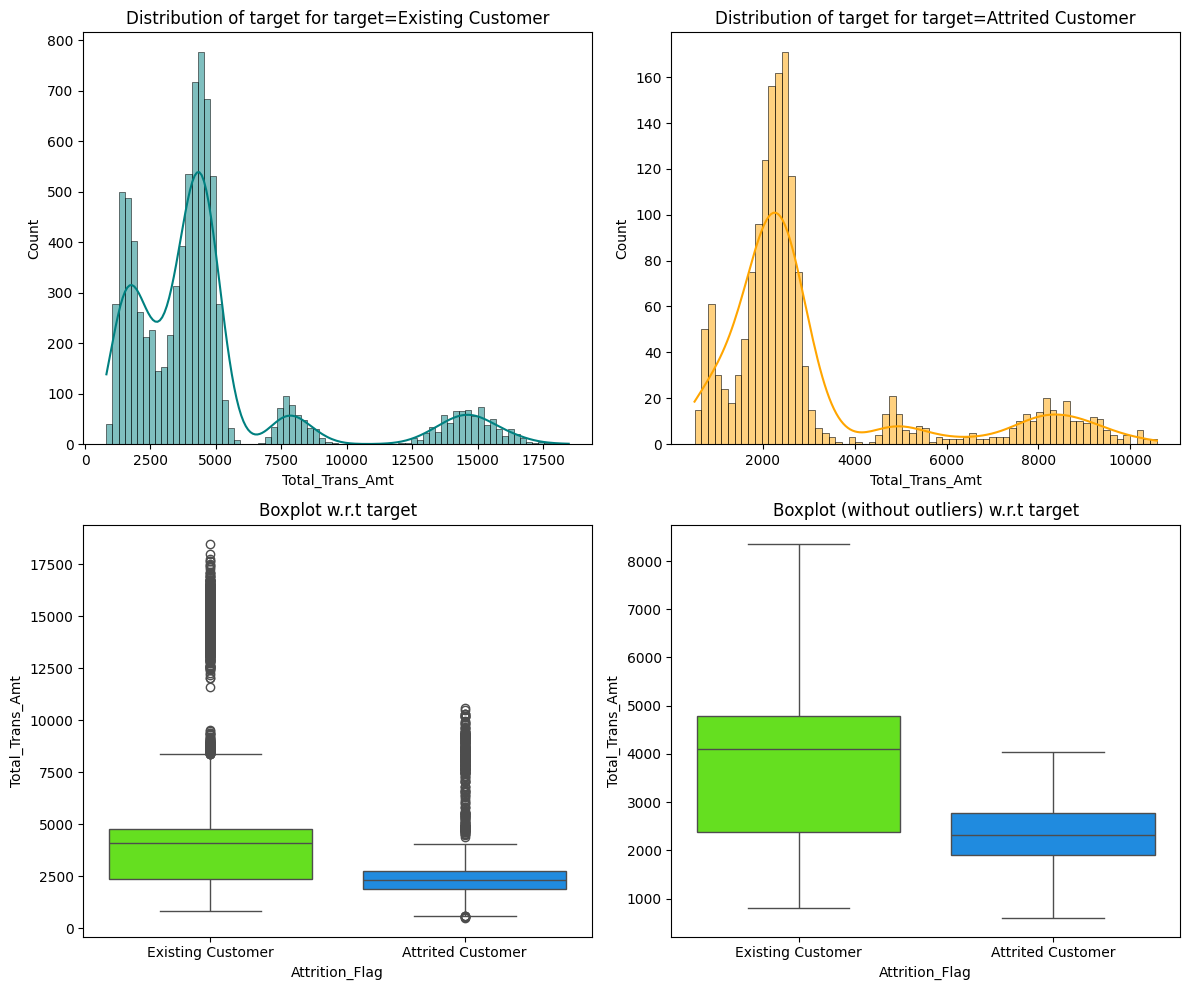

In [ ]:

distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

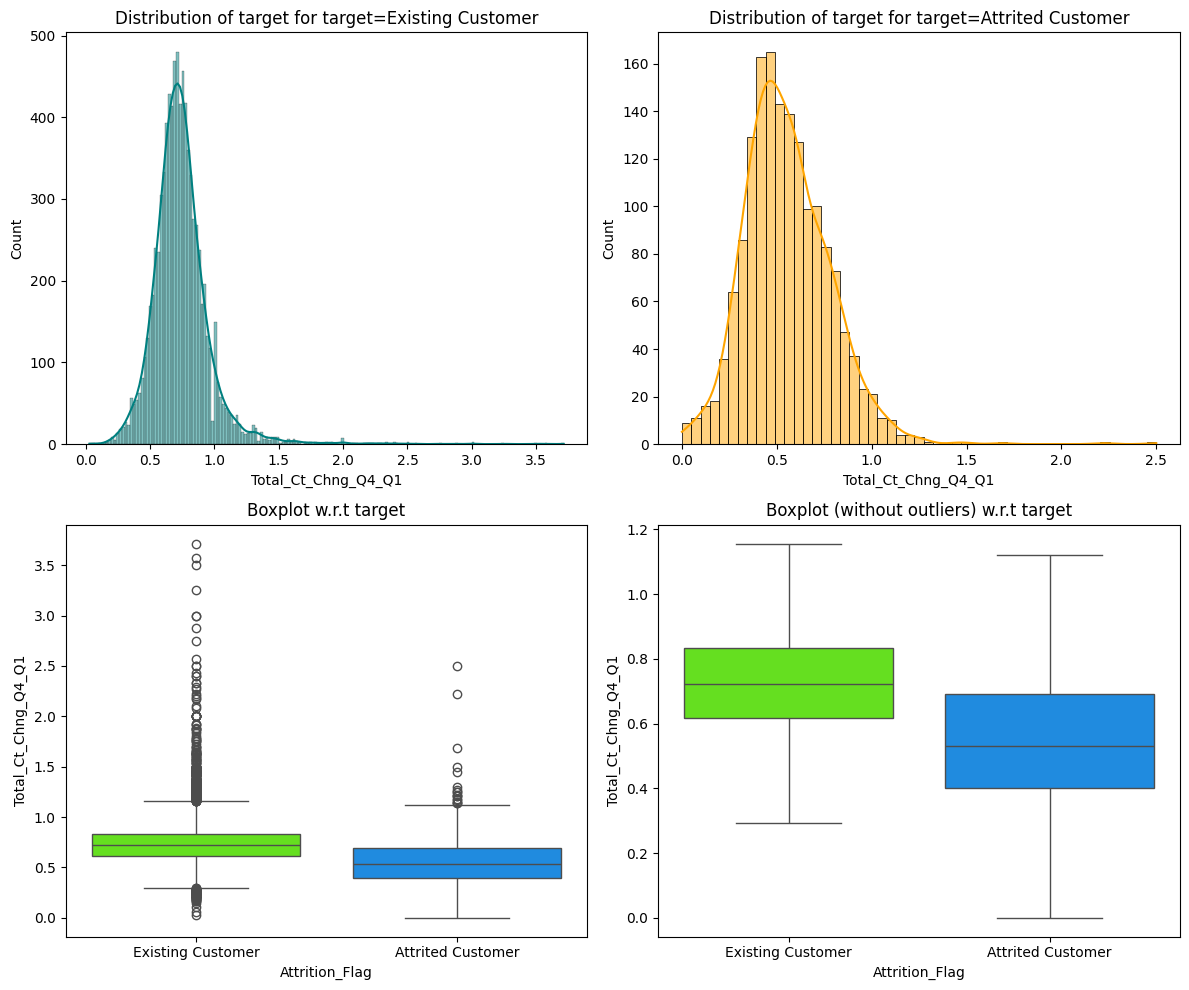

In [ ]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

* As total count of chnages are higher the customer are predicted to remain with the bank and continue utlizing the card

# Business Insights,  Recommendations and Conclusions

***

Here are some recommendations for bank executives at Thera Bank to help improve customer retention and reduce churn:

## Feature Importance Chart:
The feature importance chart highlights the most significant factors that contribute to customer churn. Key insights include:

* Total_Trans_Ct (Total Transaction Count): This is the most important feature. Customers with higher transaction counts are less likely to churn.
* Total_Relationship_Count: Customers with more products or services with the bank are less likely to churn.
* Avg_Utilization_Ratio: A high utilization ratio might indicate financial stress, leading to higher churn rates.
* Customer_Age and Total_Trans_Amt (Total Transaction Amount): Both are significant indicators of churn.

## Recommendations:

* Encourage customers to use their credit cards more frequently by offering rewards and incentives for regular usage.
Implement loyalty programs that reward customers for reaching certain transaction counts or spending levels.

* Expand Relationship with Customers: Cross-sell additional products and services to existing customers. For example, offer bundled packages that include credit cards, savings accounts, and personal loans.
Use targeted marketing campaigns to promote relevant products based on the customer's profile and past behavior.

* Monitor and Manage Credit Utilization: Educate customers about the benefits of maintaining a low credit utilization ratio and provide personalized tips on managing credit.
Offer financial wellness programs to help customers manage their finances better and reduce financial stress.

* Focus on Different Age Groups: Develop age-specific strategies to retain customers. For example, offer special benefits for young adults to encourage early adoption and build long-term relationships. Provide tailored financial advice and products for older customers to meet their specific needs.

* Track and Analyze Transaction Patterns: Continuously monitor customer transaction patterns to identify early signs of potential churn. Use predictive analytics to proactively reach out to customers who show signs of decreasing engagement.

## Validation Performance Model Comparison:
The validation performance comparison chart indicates the effectiveness of different models in predicting customer churn: Gradient Boosting trained with oversampled data has the highest accuracy, recall, and F1 score, indicating it is the best at predicting churn.